# W3646x Observational astronomy: image processing 1

In this ipython notebook we will review some techniques used to process single images. Feel free to modify and use the code for your own personal projects

First, we will need to import some python modules to have access to their functions

In [1]:
import skimage
from skimage import io                 # To load images
from skimage.transform import rotate   # To rotate the image
from skimage import exposure           # To transform the histogram
import numpy as np                     # To treat the images as numpy arrays
import matplotlib.pyplot as plt        # Library to create nice graphs
from matplotlib.colors import LogNorm  # To plot with log scales
# To prevent ipython from opening a new window with figures
%matplotlib inline                 

$\textbf{1. Load image and get information from it}$

In [2]:
path = '/Users/josemanuelzorrillamatilla/Desktop/Timelapse/'
filename = '_DSC0184.JPG'
image = io.imread(path+filename)

The image is loaded into a numpy array, and we can do operations with it as if it were a matrix

In [3]:
type(image)

numpy.ndarray

In the first component we have the image information, the first 2 dimensions give the resolution in pixels, and the third the color channels (3 for a rgb image)

In [4]:
np.shape(image[0])

(4000, 6000, 3)

And we can get some simple pixel statistics

In [5]:
print('Minimum pixel value in RGB = ',np.min(image[0]))
print('Maximum pixel value in RGB = ',np.max(image[0]))
print('Average pixel value in RGB = ',np.mean(image[0]))
print('Standard deviation pixel value in RGB = ',np.std(image[0]))

('Minimum pixel value in RGB = ', 0)
('Maximum pixel value in RGB = ', 255)
('Average pixel value in RGB = ', 60.14339545833333)
('Standard deviation pixel value in RGB = ', 38.222362588044774)


We can have a look at each channel and the composite image

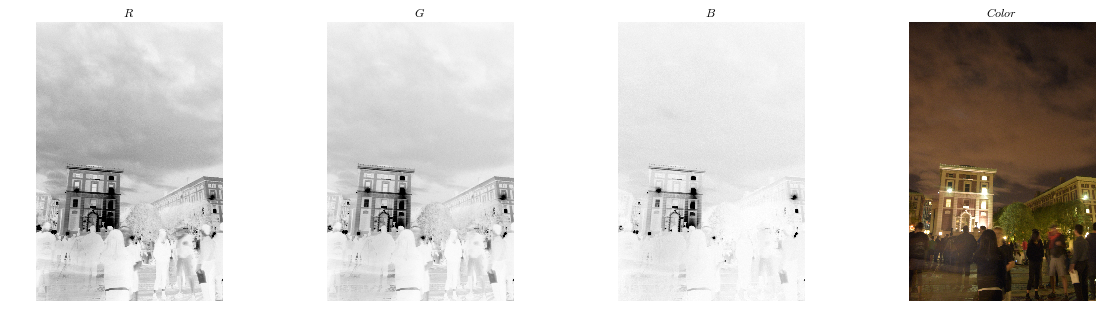

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,5))
ax[0].imshow(rotate(image[0][:,:,0],270,resize=True),cmap='Greys')
ax[0].axis('off')
ax[0].set_title('$R$')

ax[1].imshow(rotate(image[0][:,:,1],270,resize=True),cmap='Greys')
ax[1].axis('off')
ax[1].set_title('$G$')

ax[2].imshow(rotate(image[0][:,:,2],270,resize=True),cmap='Greys')
ax[2].axis('off')
ax[2].set_title('$B$')

ax[3].imshow(rotate(image[0],270,resize=True))
ax[3].axis('off')
ax[3].set_title('$Color$')


For analysis purposes, we may be interested in changing the display of an image (for instance, its scale) without changin any of the pixel values. imshow has different options that can be explored:

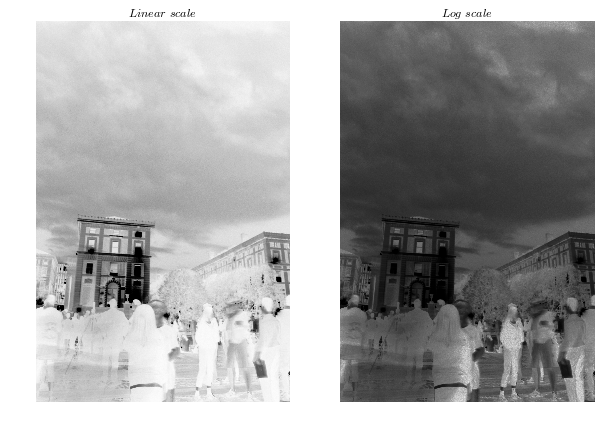

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

ax[0].imshow(rotate(image[0][:,:,0],270,resize=True),cmap='Greys',norm=None)
ax[0].axis('off')
ax[0].set_title('$Linear\,scale$')

ax[1].imshow(rotate(image[0][:,:,0],270,resize=True),cmap='Greys',norm=LogNorm())
ax[1].axis('off')
ax[1].set_title('$Log\,scale$')

We can have a look at the histograms as well, per channel and global

/Users/josemanuelzorrillamatilla/anaconda/lib/python2.7/site-packages/skimage/exposure/exposure.py:62: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warnings.warn("This might be a color image. The histogram will be "


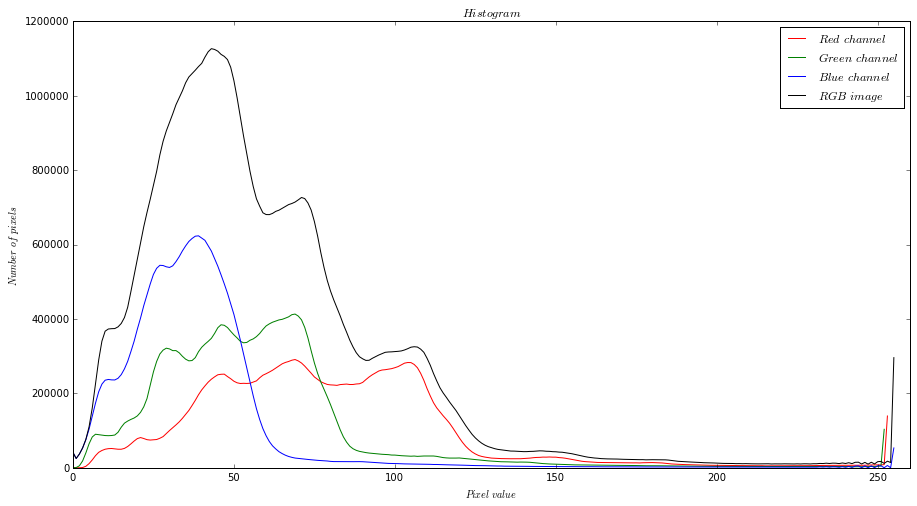

In [8]:
# Computes the histogram for each channel and the color image
hist_r = exposure.histogram(image[0][:,:,0])
hist_g = exposure.histogram(image[0][:,:,1])
hist_b = exposure.histogram(image[0][:,:,2])
hist = exposure.histogram(image[0])

# Plots the histogram
plt.figure(figsize=(15,8))
plt.plot(hist_r[0],'r',label='$Red\,channel$')
plt.plot(hist_g[0],'g',label='$Green\,channel$')
plt.plot(hist_b[0],'b',label='$Blue\,channel$')
plt.plot(hist[0],'k',label='$RGB\,image$')
plt.xlim((0,260))
plt.xlabel('$Pixel\,value$')
plt.ylabel('$Number\,of\,pixels}$')
plt.title('$Histogram$')
plt.legend(loc=1)

We can look at saturated points, per channel and globally

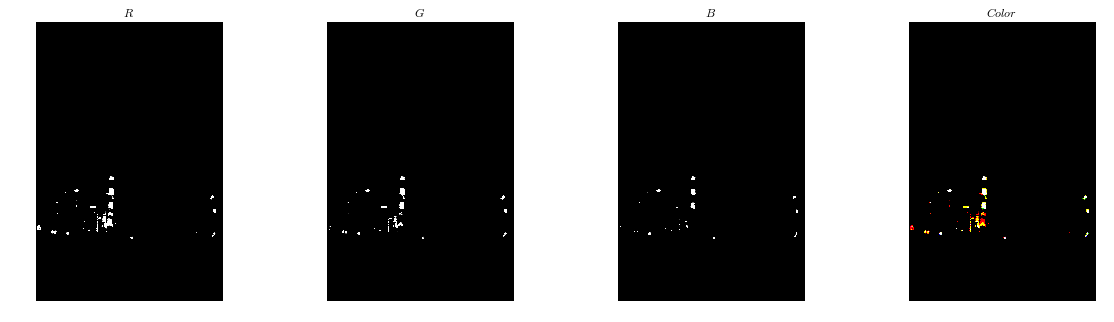

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,5))
ax[0].imshow(rotate(image[0][:,:,0]==255,270,resize=True),cmap='Greys_r')
ax[0].axis('off')
ax[0].set_title('$R$')

ax[1].imshow(rotate(image[0][:,:,1]==255,270,resize=True),cmap='Greys_r')
ax[1].axis('off')
ax[1].set_title('$G$')

ax[2].imshow(rotate(image[0][:,:,2]==255,270,resize=True),cmap='Greys_r')
ax[2].axis('off')
ax[2].set_title('$B$')

ax[3].imshow(rotate(image[0]==255,270,resize=True))
ax[3].axis('off')
ax[3].set_title('$Color$')

$\textbf{2. Manipulating a single image (changing the actual pixel values)}$

The easiest manipulation we can think of is that of changing the exposure. In post-processing this means multiplying the pixel values by a constant. This shifts the histogram "to the right" but does not change its shape. The gamma transformation allows to do so by changing the gain:

$V_{out}=A\,V_{in}^{\gamma}$

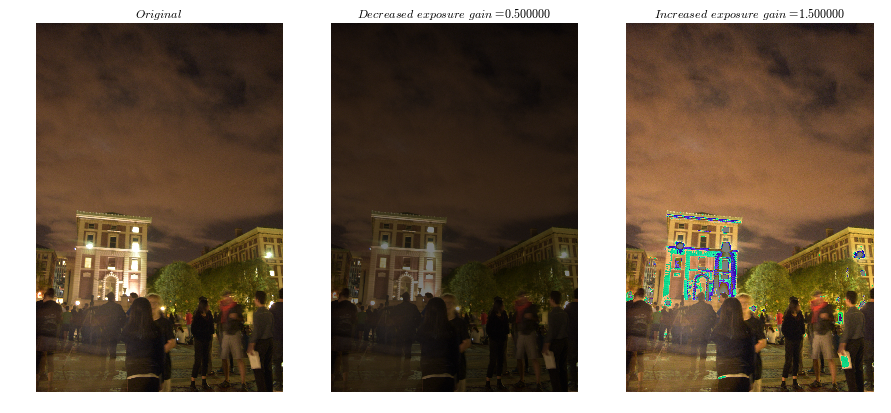

In [10]:
# Let's check what gamma adjustment does to an image, effect of gain
gamma = 1.0
gain = [0.5,1.5]

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
ax[0].imshow(rotate(image[0],270,resize=True))
ax[0].axis('off')
ax[0].set_title('$Original$')

ax[1].imshow(rotate(exposure.adjust_gamma(image[0],gamma=gamma,gain=gain[0]),270,resize=True))
ax[1].axis('off')
ax[1].set_title('$Decreased\,exposure\,gain=%f$'%gain[0])

ax[2].imshow(rotate(exposure.adjust_gamma(image[0],gamma=gamma,gain=gain[1]),270,resize=True))
ax[2].axis('off')
ax[2].set_title('$Increased\,exposure\,gain=%f$'%gain[1])


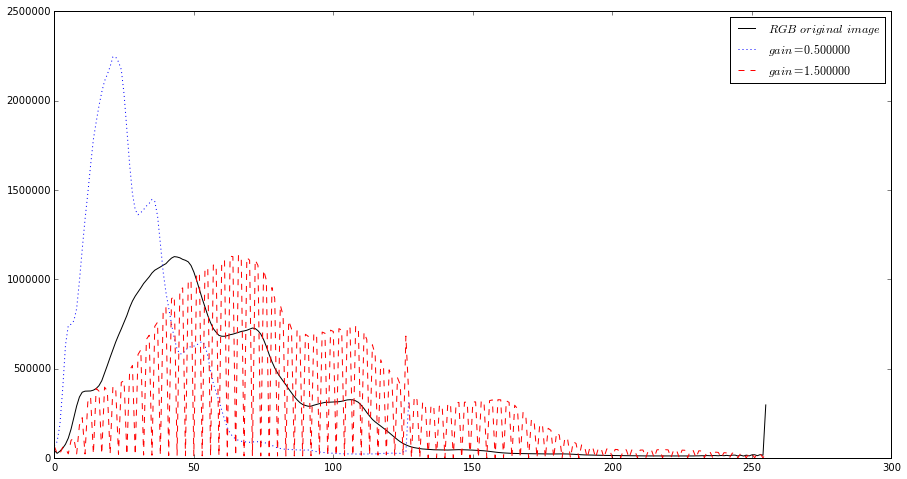

In [11]:
# And check the change in histogram
hist = exposure.histogram(image[0])
hist_low = exposure.histogram(exposure.adjust_gamma(image[0],gamma=gamma,gain=gain[0]))
hist_high = exposure.histogram(exposure.adjust_gamma(image[0],gamma=gamma,gain=gain[1]))

plt.figure(figsize=(15,8))
plt.plot(hist[0],'k',label='$RGB\,original\,image$')
plt.plot(hist_low[0],'b:',label='$gain=%f$'%gain[0])
plt.plot(hist_high[0],'r--',label='$gain=%f$'%gain[1])
plt.legend(loc=1)

The second manipulation we can think of is that of changing the contrast of the image. The gamma transformation also allows us to do so by changing the exponent

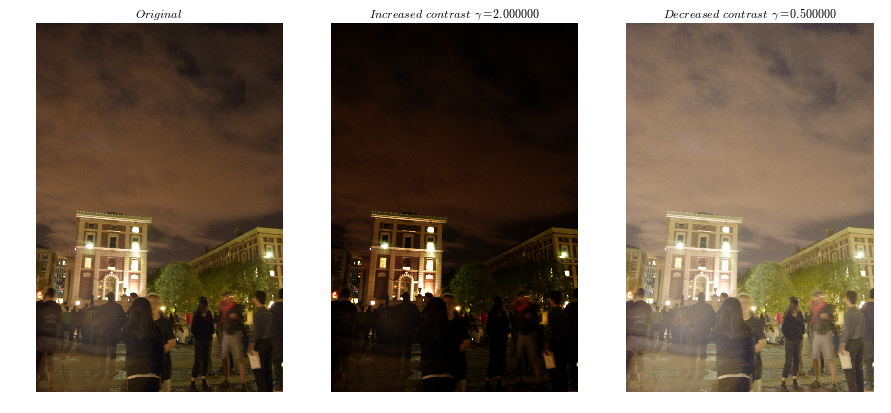

In [12]:
# Let's check what gamma adjustment does to an image, effect of gamma
gamma = [2.0, 0.5]
gain = 1.0

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
ax[0].imshow(rotate(image[0],270,resize=True))
ax[0].axis('off')
ax[0].set_title('$Original$')

ax[1].imshow(rotate(exposure.adjust_gamma(image[0],gamma=gamma[0],gain=gain),270,resize=True))
ax[1].axis('off')
ax[1].set_title('$Increased\,contrast\,\gamma=%f$'%gamma[0])

ax[2].imshow(rotate(exposure.adjust_gamma(image[0],gamma=gamma[1],gain=gain),270,resize=True))
ax[2].axis('off')
ax[2].set_title('$Decreased\,contrast\,\gamma=%f$'%gamma[1])


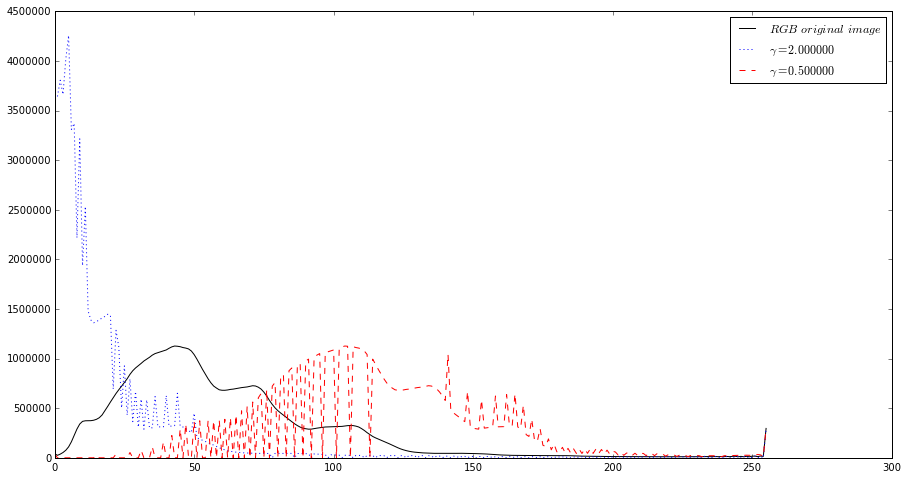

In [13]:
# And check the change in histogram
hist = exposure.histogram(image[0])
hist_high = exposure.histogram(exposure.adjust_gamma(image[0],gamma=gamma[0],gain=gain))
hist_low = exposure.histogram(exposure.adjust_gamma(image[0],gamma=gamma[1],gain=gain))

plt.figure(figsize=(15,8))
plt.plot(hist[0],'k',label='$RGB\,original\,image$')
plt.plot(hist_high[0],'b:',label='$\gamma=%f$'%gamma[0])
plt.plot(hist_low[0],'r--',label='$\gamma=%f$'%gamma[1])
plt.legend(loc=1)

Changing contrast: Histogram equalization (image stretching)

Another way to increase the contrast of an image is by stretching the histogram. This works well for images with all the information in a narrow range of pixel values, which is usually the case for astronomical images

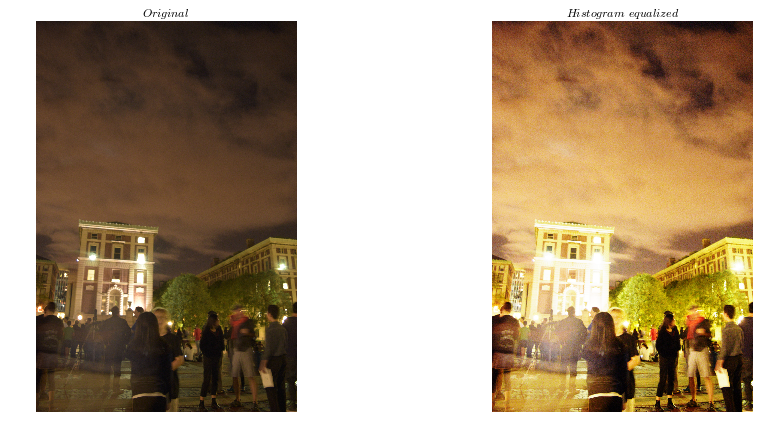

In [14]:
# Let's check what histogram equalization does to an image

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
ax[0].imshow(rotate(image[0],270,resize=True))
ax[0].axis('off')
ax[0].set_title('$Original$')

ax[1].imshow(rotate(exposure.equalize_hist(image[0]),270,resize=True))
ax[1].axis('off')
ax[1].set_title('$Histogram\,equalized$')


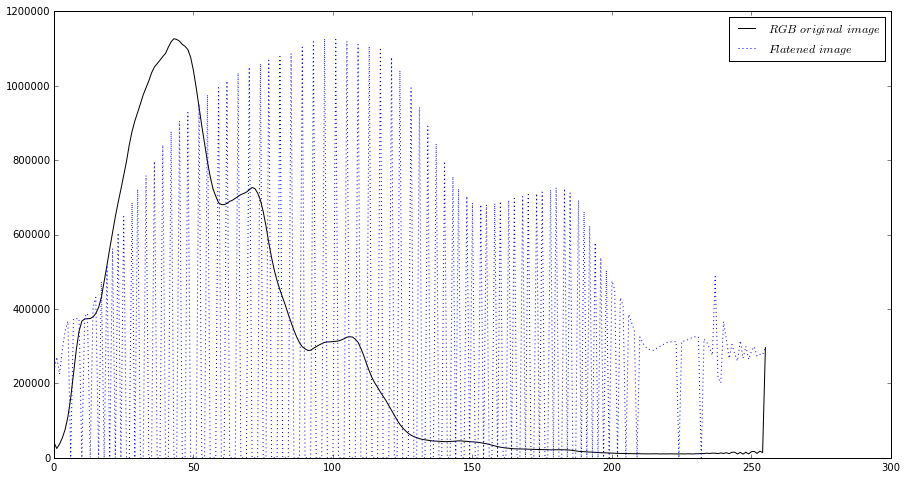

In [15]:
# And check the change in histogram
hist = exposure.histogram(image[0])
hist_flat = exposure.histogram(exposure.equalize_hist(image[0]))

plt.figure(figsize=(15,8))
plt.plot(hist[0],'k',label='$RGB\,original\,image$')
plt.plot(hist_flat[0],'b:',label='$Flatened\,image$')
plt.legend(loc=1)

There are other transformations that you can find in the description of the skimage module (in particular in the exposure sub-module:

http://scikit-image.org/docs/dev/api/api.html

Some transformations allow to reduce the apparent noise. We do not use them in astronomical applications, since what they usually do is "blur" the image applying a gaussian filter, so they do not actually remove any noise, just remove its appearance (aesthetic effect).

In astronomy, to increase the signal-to-noise of an image we use other techniques based on physically motivated noise models. We will see some of them in the next module when we discuss dark frame substraction and stacking
